In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import matplotlib.gridspec as gridspec
from textwrap import wrap


In [ ]:
train = pd.read_pickle('./5m.pkl')

In [ ]:
train.shape

(500000, 106)

---

In [ ]:
use_cols = ['fullVisitorId', 'hits_hitNumber', 'totals_hits', 'totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite', \
            'totals_transactionRevenue', 'totals_transactions', 'visitNumber', 'channelGrouping', 'customDimensions_value', 'device_browser', \
            'device_deviceCategory', 'device_operatingSystem', 'geoNetwork_continent', 'geoNetwork_subContinent', 'geoNetwork_city', \
            'geoNetwork_country', 'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region', 'hits_appInfo.exitScreenName', \
            'hits_appInfo.landingScreenName', 'hits_dataSource', 'hits_eCommerceAction.action_type', 'hits_eCommerceAction.option', \
            'hits_eCommerceAction.step', 'hits_eventInfo.eventAction', 'hits_eventInfo.eventCategory', 'hits_eventInfo.eventLabel', \
            'hits_item.currencyCode', 'hits_page.hostname', 'hits_page.pagePath', 'hits_page.searchCategory', 'hits_page.searchKeyword', \
            'hits_referer', 'trafficSource_adContent', 'trafficSource_adwordsClickInfo.adNetworkType', 'trafficSource_adwordsClickInfo.page', \
            'trafficSource_adworbdsClickInfo.slot', 'trafficSource_campaign', 'trafficSource_keyword', 'trafficSource_medium', 'trafficSource_referralPath', \
            'trafficSource_source', 'hits_exceptionInfo.isFatal', 'hits_isEntrance', 'hits_isExit', 'hits_isInteraction', 'hits_promotionActionInfo.promoIsView', \
            'hits_promotionActionInfo.promoIsClick', 'totals_bounces', 'totals_newVisits', 'trafficSource_isTrueDirect', 'trafficSource_adwordsClickInfo.isVideoAd', \
            'date', 'hits_hour', 'hits_minute', 'hits_time', 'visitStartTime']

In [ ]:
len(use_cols)

60

In [ ]:
train = train[use_cols]
train.shape

(500000, 60)

In [ ]:
train.date = train.date.astype('str')
train.date = pd.to_datetime(train.date)

In [ ]:
train = train.replace(np.nan, 'Not Recorded')
train.head()

,fullVisitorId,hits_hitNumber,totals_hits,totals_pageviews,totals_sessionQualityDim,totals_timeOnSite,totals_transactionRevenue,totals_transactions,visitNumber,channelGrouping,...,hits_promotionActionInfo.promoIsClick,totals_bounces,totals_newVisits,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.isVideoAd,date,hits_hour,hits_minute,hits_time,visitStartTime
0,3162355547410993243,1,1,1,1,Not Recorded,0,Not Recorded,1,Organic Search,...,Not Recorded,1,1,Not Recorded,Not Recorded,2017-10-16,17,0,0,1508198450
1,8934116514970143966,1,2,2,2,28,0,Not Recorded,6,Referral,...,Not Recorded,Not Recorded,Not Recorded,Not Recorded,Not Recorded,2017-10-16,10,51,0,1508176307
2,7992466427990357681,1,2,2,1,38,0,Not Recorded,1,Direct,...,Not Recorded,Not Recorded,1,True,Not Recorded,2017-10-16,17,53,0,1508201613
3,9075655783635761930,1,2,2,1,1,0,Not Recorded,1,Organic Search,...,Not Recorded,Not Recorded,1,Not Recorded,Not Recorded,2017-10-16,9,4,0,1508169851
4,6960673291025684308,1,2,2,1,52,0,Not Recorded,1,Organic Search,...,Not Recorded,Not Recorded,1,Not Recorded,Not Recorded,2017-10-16,14,49,0,1508190552


---

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/2817359086.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


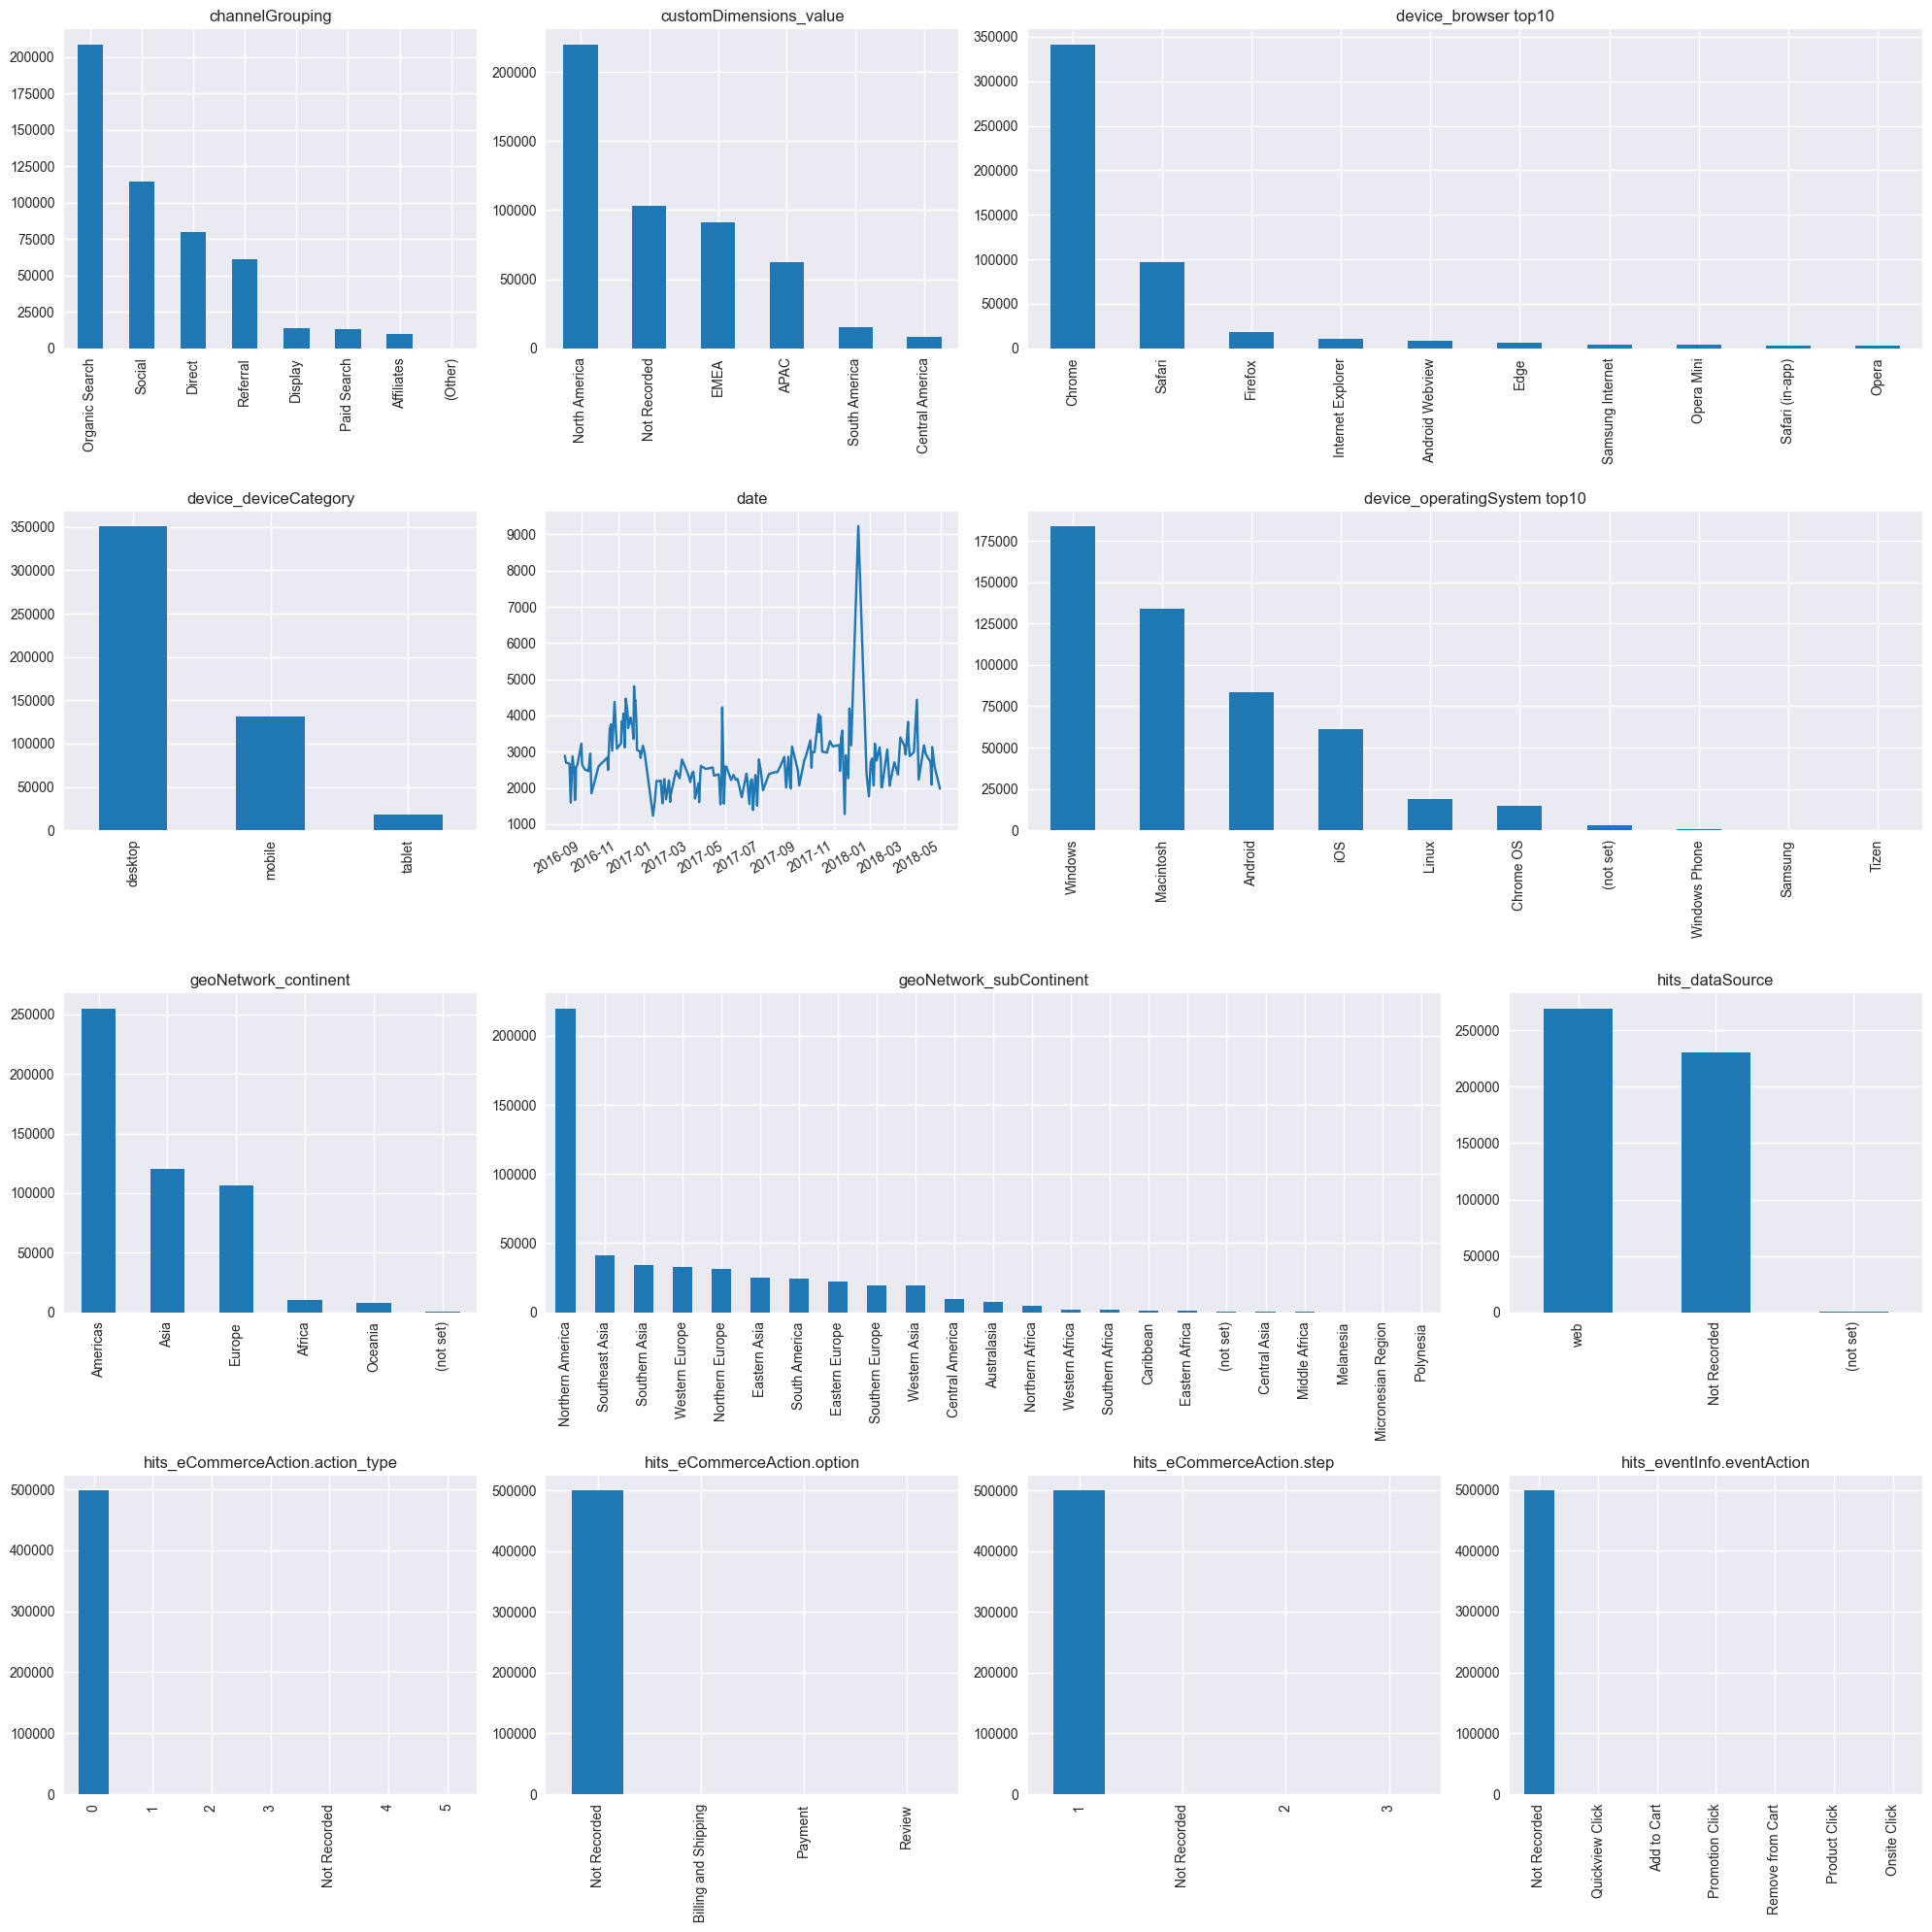

In [ ]:
nrows = 4
ncols = 4
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(gs[0, 0])
train.channelGrouping.value_counts().plot(kind='bar', ax=plot1, title='channelGrouping', colormap='tab20')

plot2 = fig.add_subplot(gs[0, 1])
train.customDimensions_value.value_counts().plot(kind='bar', ax=plot2, title='customDimensions_value', colormap='tab20')

plot3 = fig.add_subplot(gs[0, 2:])
train.device_browser.value_counts()[:10].plot(kind='bar', ax=plot3, title='device_browser top10', colormap='tab20')

plot4 = fig.add_subplot(gs[1, 0])
train.device_deviceCategory.value_counts().plot(kind='bar', ax=plot4, title='device_deviceCategory', colormap='tab20')

plot5 = fig.add_subplot(gs[1, 2:])
train.device_operatingSystem.value_counts()[:10].plot(kind='bar', ax=plot5, title= 'device_operatingSystem top10',  colormap='tab20')

plot6 = fig.add_subplot(gs[1, 1])
train.date.value_counts().plot(kind='line', ax=plot6, title='date', colormap='tab20')

plot7 = fig.add_subplot(gs[2, 0])
train.geoNetwork_continent.value_counts().plot(kind='bar', ax=plot7, title= 'geoNetwork_continent',  colormap='tab20')

plot8 = fig.add_subplot(gs[2, 1:3])
train.geoNetwork_subContinent.value_counts().plot(kind='bar', ax=plot8, title= 'geoNetwork_subContinent',  colormap='tab20')

plot9 = fig.add_subplot(gs[2, 3])
train.hits_dataSource.value_counts().plot(kind='bar', ax=plot9, title= 'hits_dataSource',  colormap='tab20')

plot10 = fig.add_subplot(gs[3, 0])
train['hits_eCommerceAction.action_type'].value_counts().plot(kind='bar', ax=plot10, title= 'hits_eCommerceAction.action_type',  colormap='tab20')

plot11 = fig.add_subplot(gs[3, 1])
train['hits_eCommerceAction.option'].value_counts().plot(kind='bar', ax=plot11, title= 'hits_eCommerceAction.option',  colormap='tab20')

plot12 = fig.add_subplot(gs[3, 2])
train['hits_eCommerceAction.step'].value_counts().plot(kind='bar', ax=plot12, title= 'hits_eCommerceAction.step',  colormap='tab20')

plot13 = fig.add_subplot(gs[3, 3])
train['hits_eventInfo.eventAction'].value_counts().plot(kind='bar', ax=plot13, title= 'hits_eventInfo.eventAction',  colormap='tab20')

plt.tight_layout()
plt.show()

- device_operatingSystem : (not set) 3207개
- geoNetwork_continent : (not set) 704개
- hits_dataSource : 230223개의 nan
- hits_eCommerceAction.option : 29개 값

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/4046749871.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


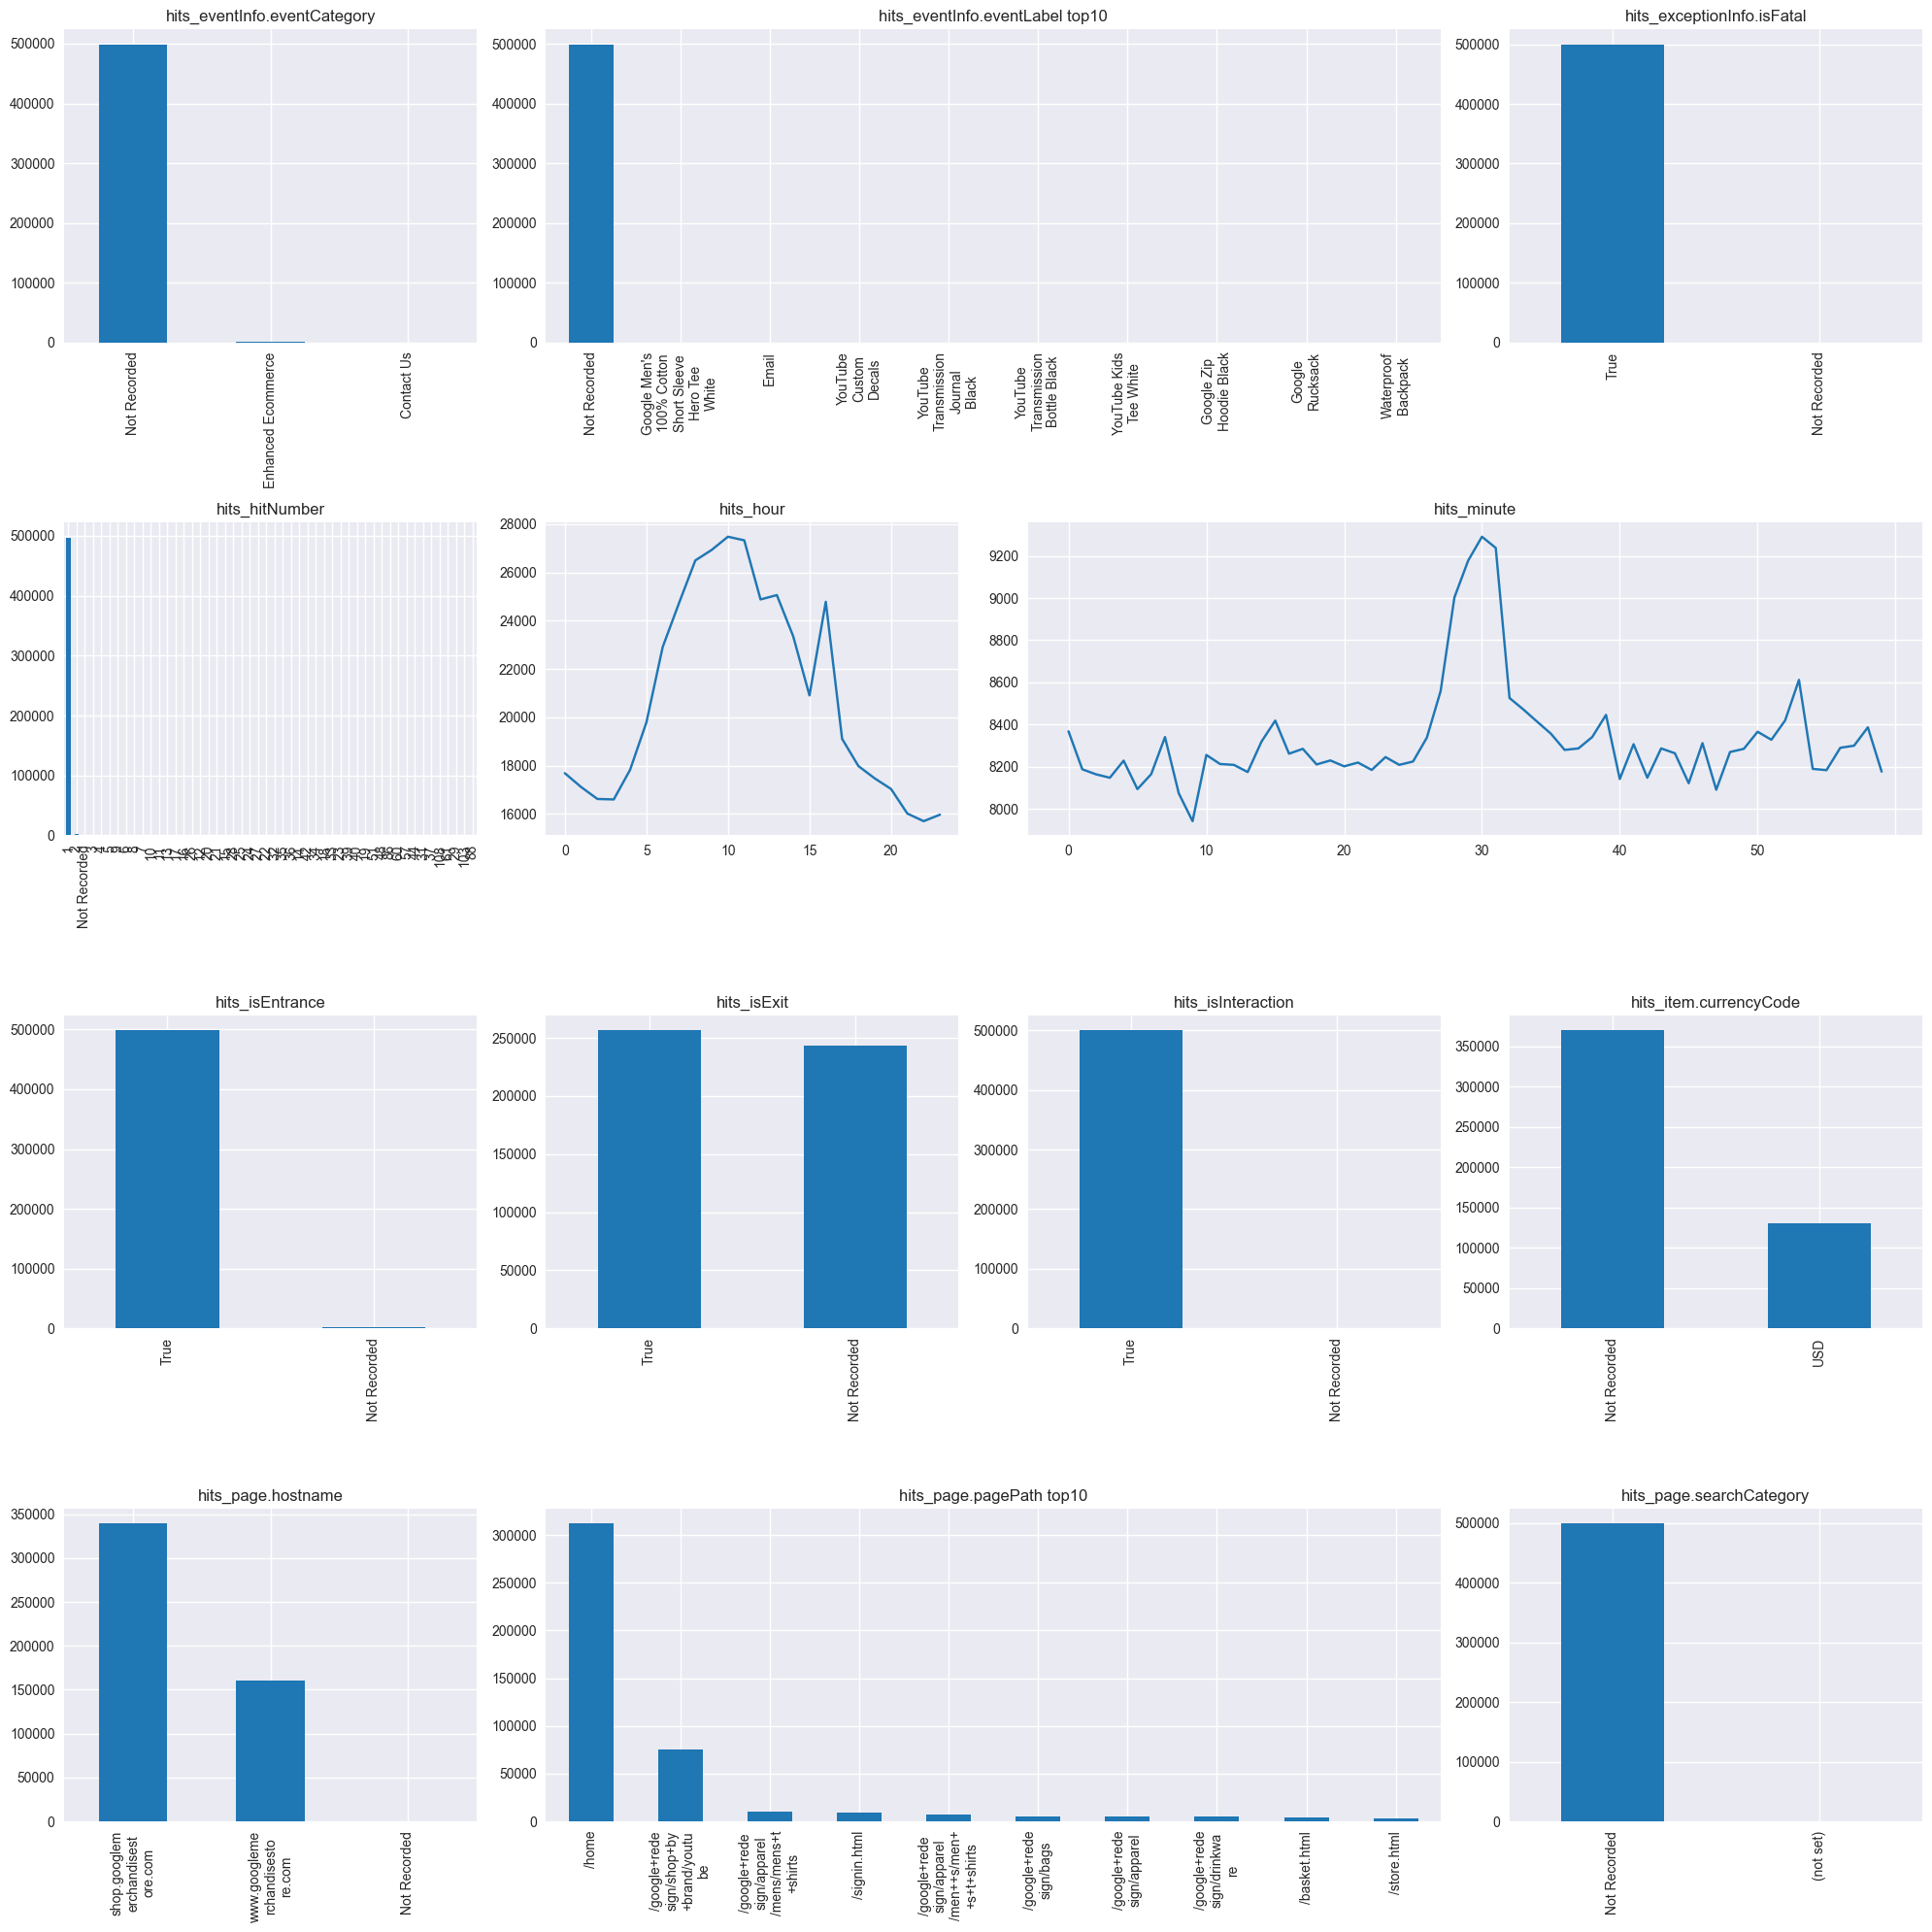

In [ ]:
nrows = 4
ncols = 4
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(gs[0, 0])
train['hits_eventInfo.eventCategory'].value_counts().plot(kind='bar', ax=plot1, title='hits_eventInfo.eventCategory', colormap='tab20')

plot2 = fig.add_subplot(gs[0, 1:3])
labels = list(train['hits_eventInfo.eventLabel'].value_counts()[:10].index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['hits_eventInfo.eventLabel'].value_counts()[:10].plot(kind='bar', ax=plot2, title='hits_eventInfo.eventLabel top10', colormap='tab20')
plot2.set_xticklabels(labels)

plot3 = fig.add_subplot(gs[0, 3])
train['hits_exceptionInfo.isFatal'].value_counts()[:10].plot(kind='bar', ax=plot3, title='hits_exceptionInfo.isFatal', colormap='tab20')

plot4 = fig.add_subplot(gs[1, 0])
train['hits_hitNumber'].value_counts().plot(kind='bar', ax=plot4, title='hits_hitNumber', colormap='tab20')

plot5 = fig.add_subplot(gs[1, 1])
hours = [str(n) for n in range(0, 24)]
train['hits_hour'].value_counts()[hours].plot(kind='line', ax=plot5, title= 'hits_hour',  colormap='tab20')

plot6 = fig.add_subplot(gs[1, 2:])
minutes = [str(n) for n in range(0, 60)]
train['hits_minute'].value_counts()[minutes].plot(kind='line', ax=plot6, title= 'hits_minute',  colormap='tab20')

plot7 = fig.add_subplot(gs[2, 0])
train['hits_isEntrance'].value_counts().plot(kind='bar', ax=plot7, title= 'hits_isEntrance',  colormap='tab20')

plot8 = fig.add_subplot(gs[2, 1])
train['hits_isExit'].value_counts().plot(kind='bar', ax=plot8, title= 'hits_isExit',  colormap='tab20')

plot9 = fig.add_subplot(gs[2, 2])
train['hits_isInteraction'].value_counts().plot(kind='bar', ax=plot9, title= 'hits_isInteraction',  colormap='tab20')

plot10 = fig.add_subplot(gs[2, 3])
train['hits_item.currencyCode'].value_counts().plot(kind='bar', ax=plot10, title= 'hits_item.currencyCode',  colormap='tab20')

plot11 = fig.add_subplot(gs[3, 0])
labels = list(train['hits_page.hostname'].value_counts().index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['hits_page.hostname'].value_counts().plot(kind='bar', ax=plot11, title= 'hits_page.hostname',  colormap='tab20')
plot11.set_xticklabels(labels)

plot12 = fig.add_subplot(gs[3, 1:3])
labels = list(train['hits_page.pagePath'].value_counts()[:10].index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['hits_page.pagePath'].value_counts()[:10].plot(kind='bar', ax=plot12, title= 'hits_page.pagePath top10',  colormap='tab20')
plot12.set_xticklabels(labels)

plot13 = fig.add_subplot(gs[3, 3])
train['hits_page.searchCategory'].value_counts().plot(kind='bar', ax=plot13, title= 'hits_page.searchCategory',  colormap='tab20')

plt.tight_layout()
plt.show()

- hits_eventInfo.eventCategory : 1256개의 값
- hits_exceptionInfo.isFatal : 499791의 True, 나머지 nan
- hits_hitNumber : 50만 근처에 이상한값
- hits_isEntrance : 498505 True, 나머지 nan
- hits_isExit : 256574 True, 나머지 nan
- hits_isInteraction : 499791 True, 나머지 nan
- hits_item.currencyCode : 130200 USD, 나머지 nan
- hits_page.searchCategory : (not set) 247개

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/483005121.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


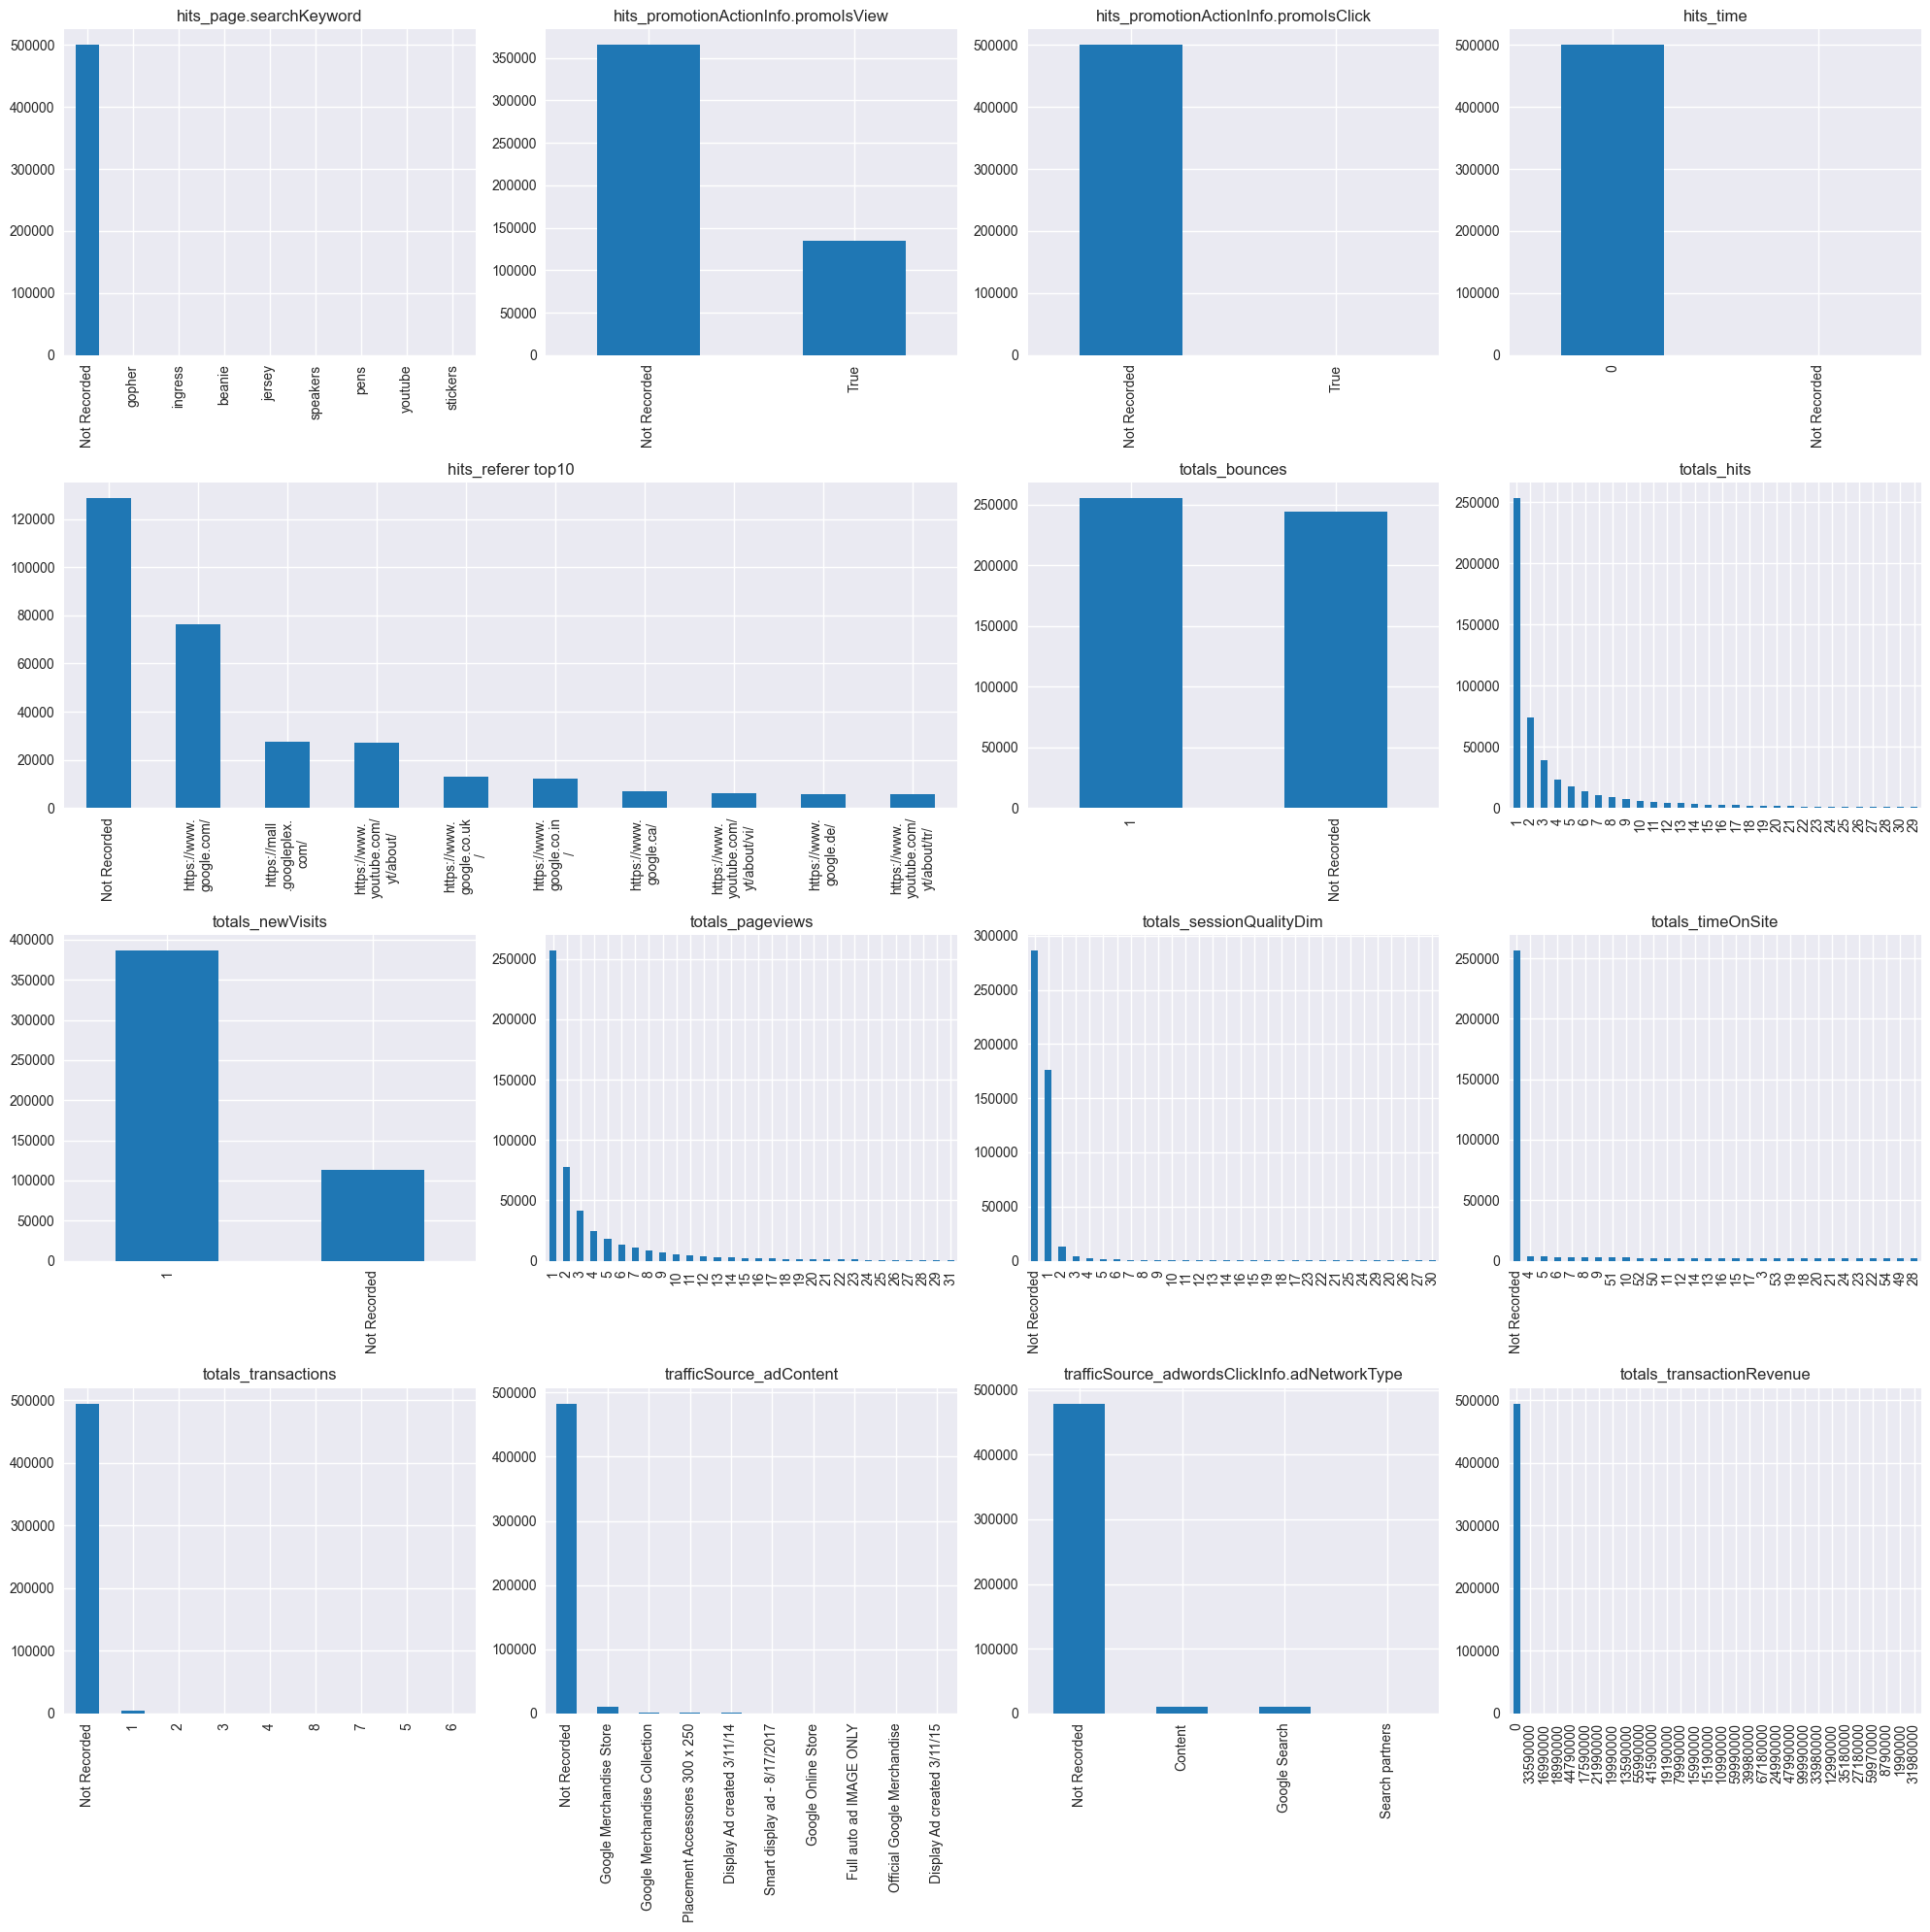

In [ ]:
nrows = 4
ncols = 4
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(gs[0, 0])
train['hits_page.searchKeyword'].value_counts().plot(kind='bar', ax=plot1, title='hits_page.searchKeyword', colormap='tab20')

plot2 = fig.add_subplot(gs[0, 1])
train['hits_promotionActionInfo.promoIsView'].value_counts().plot(kind='bar', ax=plot2, title='hits_promotionActionInfo.promoIsView', colormap='tab20')

plot3 = fig.add_subplot(gs[0, 2])
train['hits_promotionActionInfo.promoIsClick'].value_counts()[:10].plot(kind='bar', ax=plot3, title='hits_promotionActionInfo.promoIsClick', colormap='tab20')

plot4 = fig.add_subplot(gs[1,:2])
labels = list(train['hits_referer'].value_counts()[:10].index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['hits_referer'].value_counts()[:10].plot(kind='bar', ax=plot4, title='hits_referer top10', colormap='tab20')
plot4.set_xticklabels(labels)

plot5 = fig.add_subplot(gs[0, 3])
train['hits_time'].value_counts().plot(kind='bar', ax=plot5, title= 'hits_time',  colormap='tab20')

plot6 = fig.add_subplot(gs[1, 2])
train['totals_bounces'].value_counts().plot(kind='bar', ax=plot6, title= 'totals_bounces',  colormap='tab20')

plot7 = fig.add_subplot(gs[1, 3])
train['totals_hits'].value_counts()[:30].plot(kind='bar', ax=plot7, title= 'totals_hits',  colormap='tab20')

plot8 = fig.add_subplot(gs[2, 0])
train['totals_newVisits'].value_counts().plot(kind='bar', ax=plot8, title= 'totals_newVisits',  colormap='tab20')

plot9 = fig.add_subplot(gs[2, 1])
train['totals_pageviews'].value_counts()[:30].plot(kind='bar', ax=plot9, title= 'totals_pageviews',  colormap='tab20')

plot10 = fig.add_subplot(gs[2, 2])
train['totals_sessionQualityDim'].value_counts()[:30].plot(kind='bar', ax=plot10, title= 'totals_sessionQualityDim',  colormap='tab20')

plot11 = fig.add_subplot(gs[2, 3])
train['totals_timeOnSite'].value_counts()[:30].plot(kind='bar', ax=plot11, title= 'totals_timeOnSite',  colormap='tab20')

plot12 = fig.add_subplot(gs[3, 0])
train['totals_transactions'].value_counts()[:10].plot(kind='bar', ax=plot12, title= 'totals_transactions',  colormap='tab20')

plot13 = fig.add_subplot(gs[3, 1])
train['trafficSource_adContent'].value_counts()[:10].plot(kind='bar', ax=plot13, title= 'trafficSource_adContent',  colormap='tab20')

plot14 = fig.add_subplot(gs[3, 2])
train['trafficSource_adwordsClickInfo.adNetworkType'].value_counts().plot(kind='bar', ax=plot14, title= 'trafficSource_adwordsClickInfo.adNetworkType',  colormap='tab20')

plot15 = fig.add_subplot(gs[3, 3])
train['totals_transactionRevenue'].value_counts()[:30].plot(kind='bar', ax=plot15, title= 'totals_transactionRevenue',  colormap='tab20')

plt.tight_layout()
plt.show()

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/3536516964.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


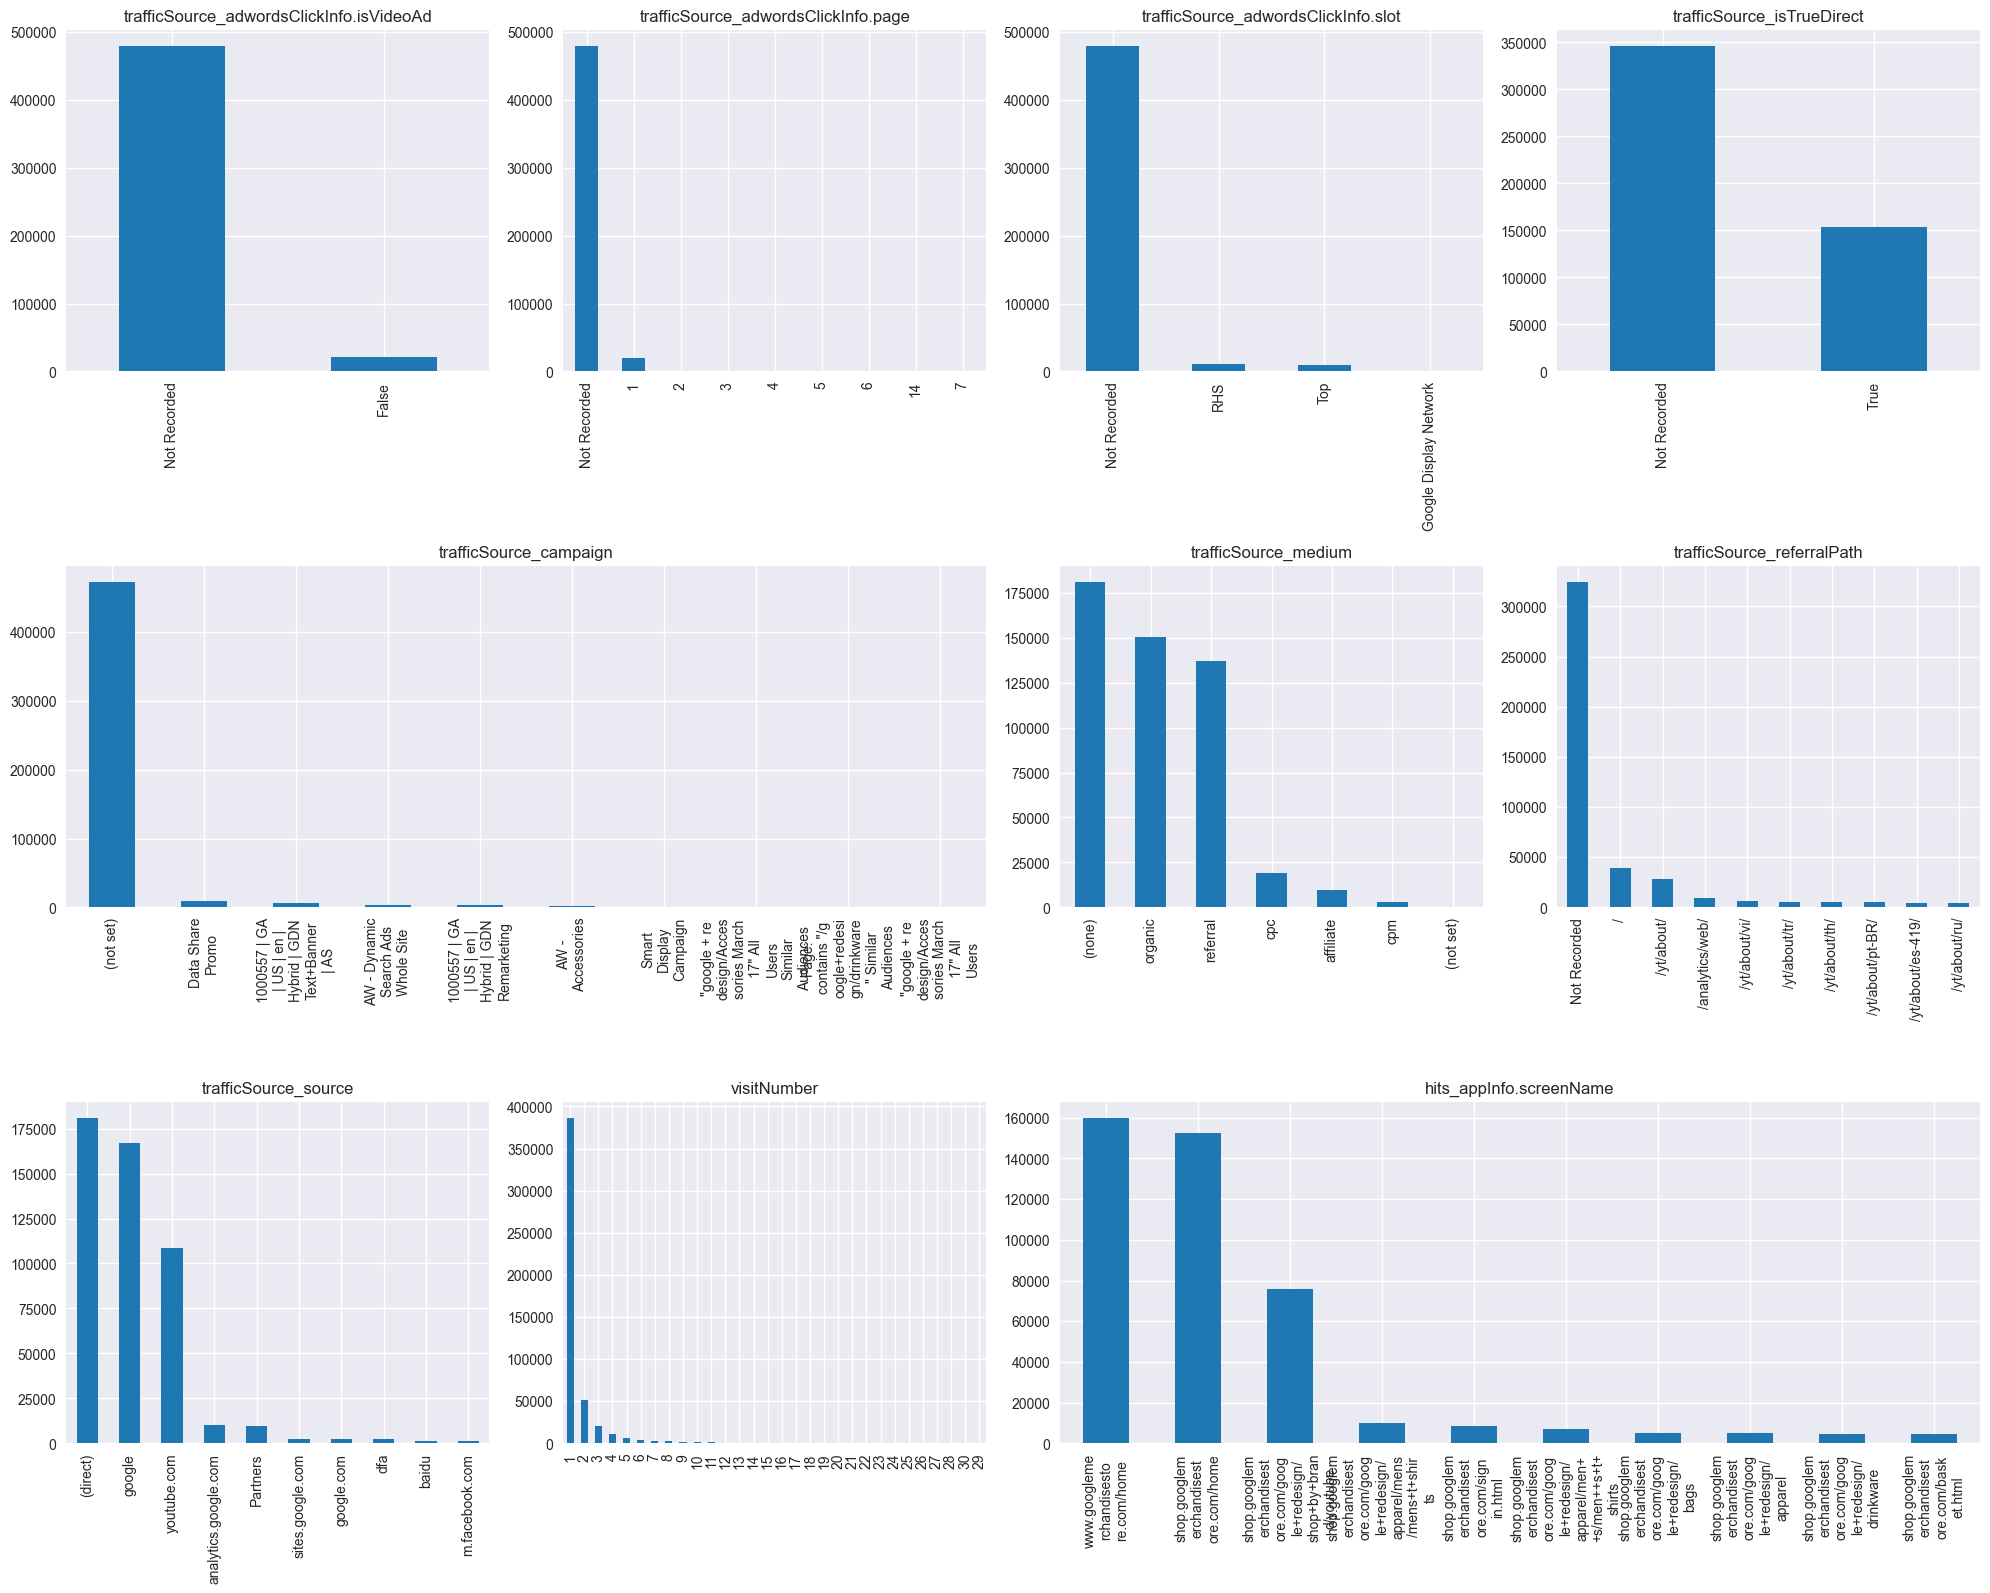

In [ ]:
nrows = 4
ncols = 4
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 20))

plot1 = fig.add_subplot(gs[0, 0])
train['trafficSource_adwordsClickInfo.isVideoAd'].value_counts().plot(kind='bar', ax=plot1, title='trafficSource_adwordsClickInfo.isVideoAd', colormap='tab20')

plot2 = fig.add_subplot(gs[0, 1])
train['trafficSource_adwordsClickInfo.page'].value_counts().plot(kind='bar', ax=plot2, title='trafficSource_adwordsClickInfo.page', colormap='tab20')

plot3 = fig.add_subplot(gs[0, 2])
train['trafficSource_adwordsClickInfo.slot'].value_counts().plot(kind='bar', ax=plot3, title='trafficSource_adwordsClickInfo.slot', colormap='tab20')

plot4 = fig.add_subplot(gs[1, :2])
labels = list(train['trafficSource_campaign'].value_counts()[:10].index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['trafficSource_campaign'].value_counts()[:10].plot(kind='bar', ax=plot4, title='trafficSource_campaign', colormap='tab20')
plot4.set_xticklabels(labels)

plot5 = fig.add_subplot(gs[0, 3])
train['trafficSource_isTrueDirect'].value_counts().plot(kind='bar', ax=plot5, title= 'trafficSource_isTrueDirect',  colormap='tab20')

plot6 = fig.add_subplot(gs[1, 2])
train['trafficSource_medium'].value_counts()[:10].plot(kind='bar', ax=plot6, title= 'trafficSource_medium',  colormap='tab20')

plot7 = fig.add_subplot(gs[1, 3])
train['trafficSource_referralPath'].value_counts()[:10].plot(kind='bar', ax=plot7, title= 'trafficSource_referralPath',  colormap='tab20')

plot8 = fig.add_subplot(gs[2, 0])
train['trafficSource_source'].value_counts()[:10].plot(kind='bar', ax=plot8, title= 'trafficSource_source',  colormap='tab20')

plot9 = fig.add_subplot(gs[2, 1])
train['visitNumber'].value_counts()[:30].plot(kind='bar', ax=plot9, title= 'visitNumber',  colormap='tab20')

plot10 = fig.add_subplot(gs[2, 2:])
labels = list(train['hits_appInfo.screenName'].value_counts()[:10].index)
labels = ['\n'.join(wrap(l, 12)) for l in labels]
train['hits_appInfo.screenName'].value_counts()[:10].plot(kind='bar', ax=plot10, title='hits_appInfo.screenName', colormap='tab20')
plot10.set_xticklabels(labels)

plt.tight_layout()
plt.show()

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/2949610783.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


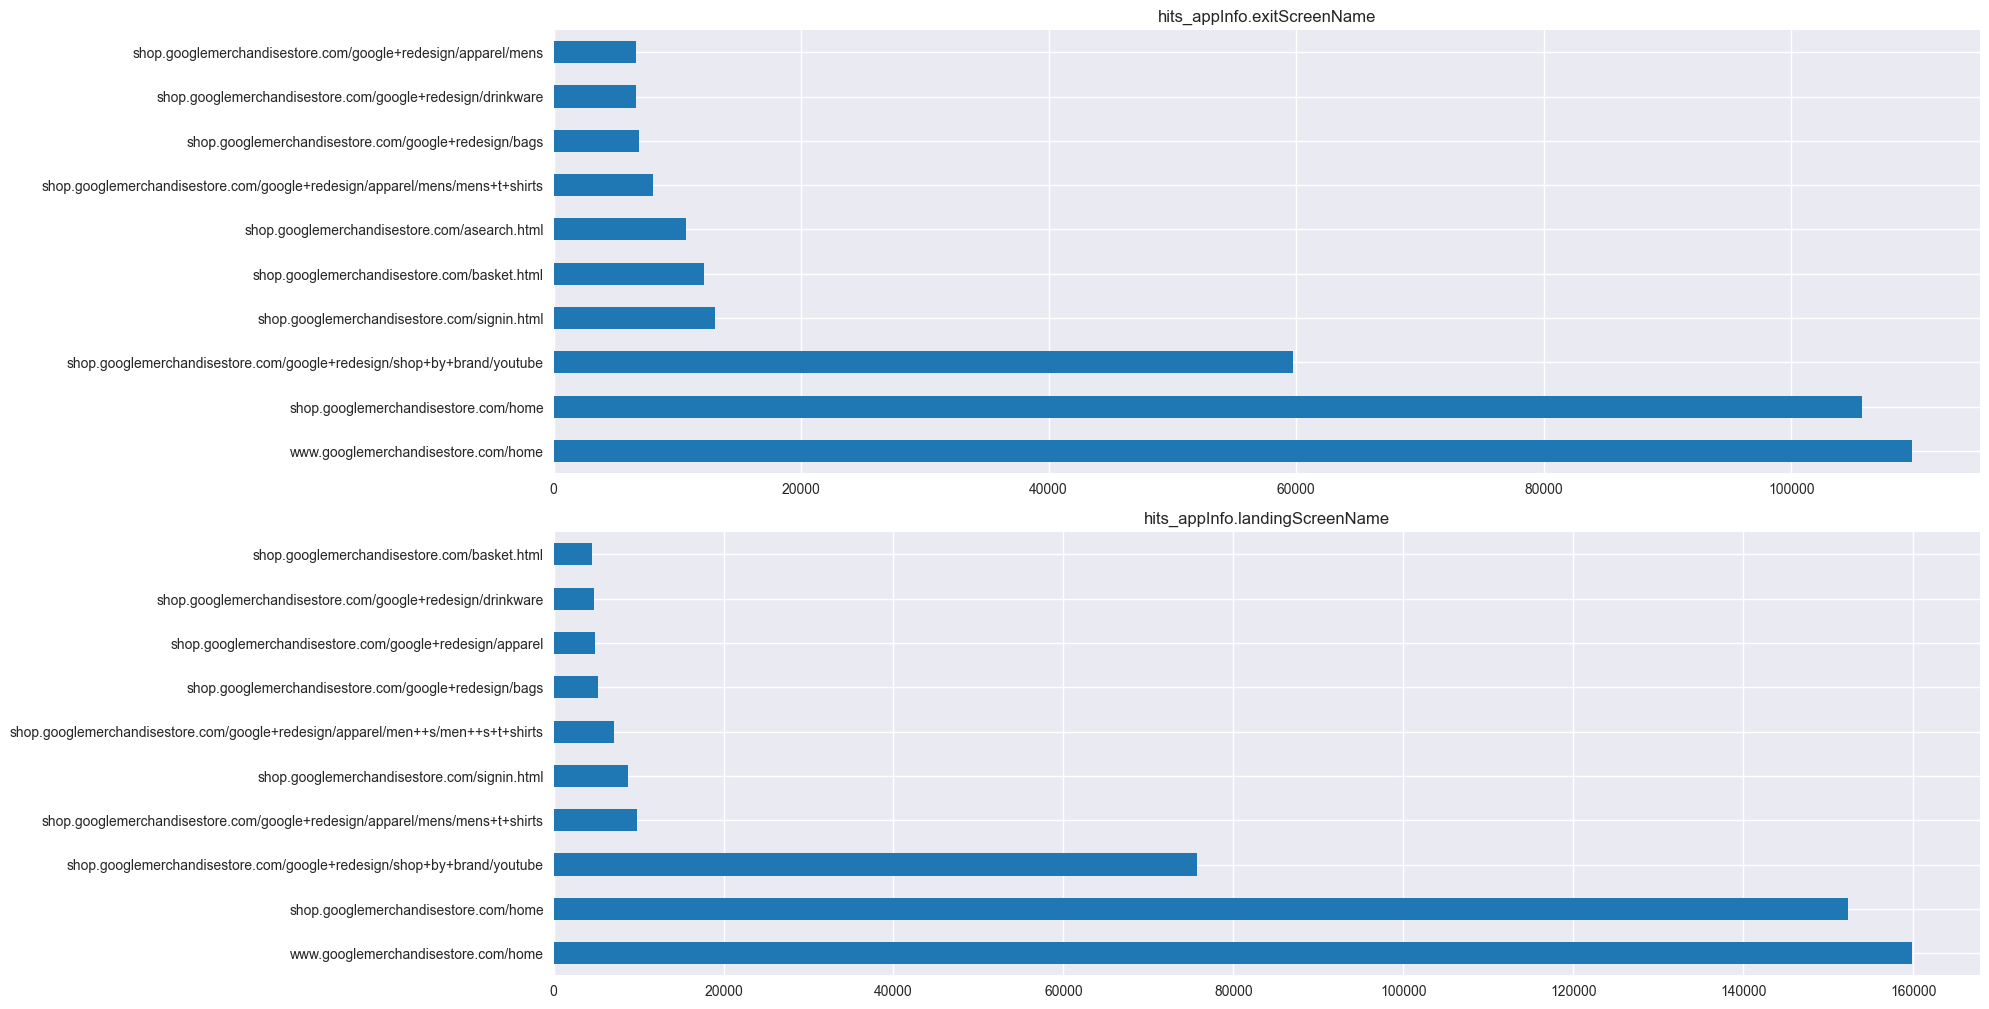

In [ ]:
# hits_appInfo
nrows = 4
ncols = 1
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')

fig = plt.figure(figsize=(20, 20))
plot9 = fig.add_subplot(gs[0, 0])
train['hits_appInfo.exitScreenName'].value_counts()[:10].plot(kind='barh', ax=plot9, title= 'hits_appInfo.exitScreenName',  colormap='tab20')

plot10 = fig.add_subplot(gs[1, 0])
train['hits_appInfo.landingScreenName'].value_counts()[:10].plot(kind='barh', ax=plot10, title= 'hits_appInfo.landingScreenName',  colormap='tab20')

plt.tight_layout()
plt.show()

---

수치형 데이터 상관관계

In [ ]:
train = pd.read_pickle('./5m.pkl')

In [ ]:
chk_corr = train[['hits_hitNumber', 'totals_hits', 'totals_pageviews', 'totals_timeOnSite', 'totals_transactionRevenue', 'totals_transactions', 'visitNumber']]
chk_corr.shape

(500000, 7)

In [ ]:
chk_corr = chk_corr.astype('float')
chk_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hits_hitNumber             499791 non-null  float64
 1   totals_hits                500000 non-null  float64
 2   totals_pageviews           499933 non-null  float64
 3   totals_timeOnSite          243638 non-null  float64
 4   totals_transactionRevenue  500000 non-null  float64
 5   totals_transactions        5341 non-null    float64
 6   visitNumber                500000 non-null  float64
dtypes: float64(7)
memory usage: 26.7 MB


In [ ]:
round(chk_corr.corr(),2)

,hits_hitNumber,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_transactions,visitNumber
hits_hitNumber,1.00,0.02,0.02,0.02,0.00,-0.01,0.00
totals_hits,0.02,1.00,0.98,0.57,0.21,0.28,0.04
totals_pageviews,0.02,0.98,1.00,0.60,0.21,0.32,0.04
totals_timeOnSite,0.02,0.57,0.60,1.00,0.14,0.24,0.07
totals_transactionRevenue,0.00,0.21,0.21,0.14,1.00,0.03,0.02
totals_transactions,-0.01,0.28,0.32,0.24,0.03,1.00,0.06
visitNumber,0.00,0.04,0.04,0.07,0.02,0.06,1.00


In [ ]:
chk_corr_log = np.log(chk_corr).corr()

/Users/hwangseungju/miniforge3/envs/ds_study/lib/python3.8/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/2231133718.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


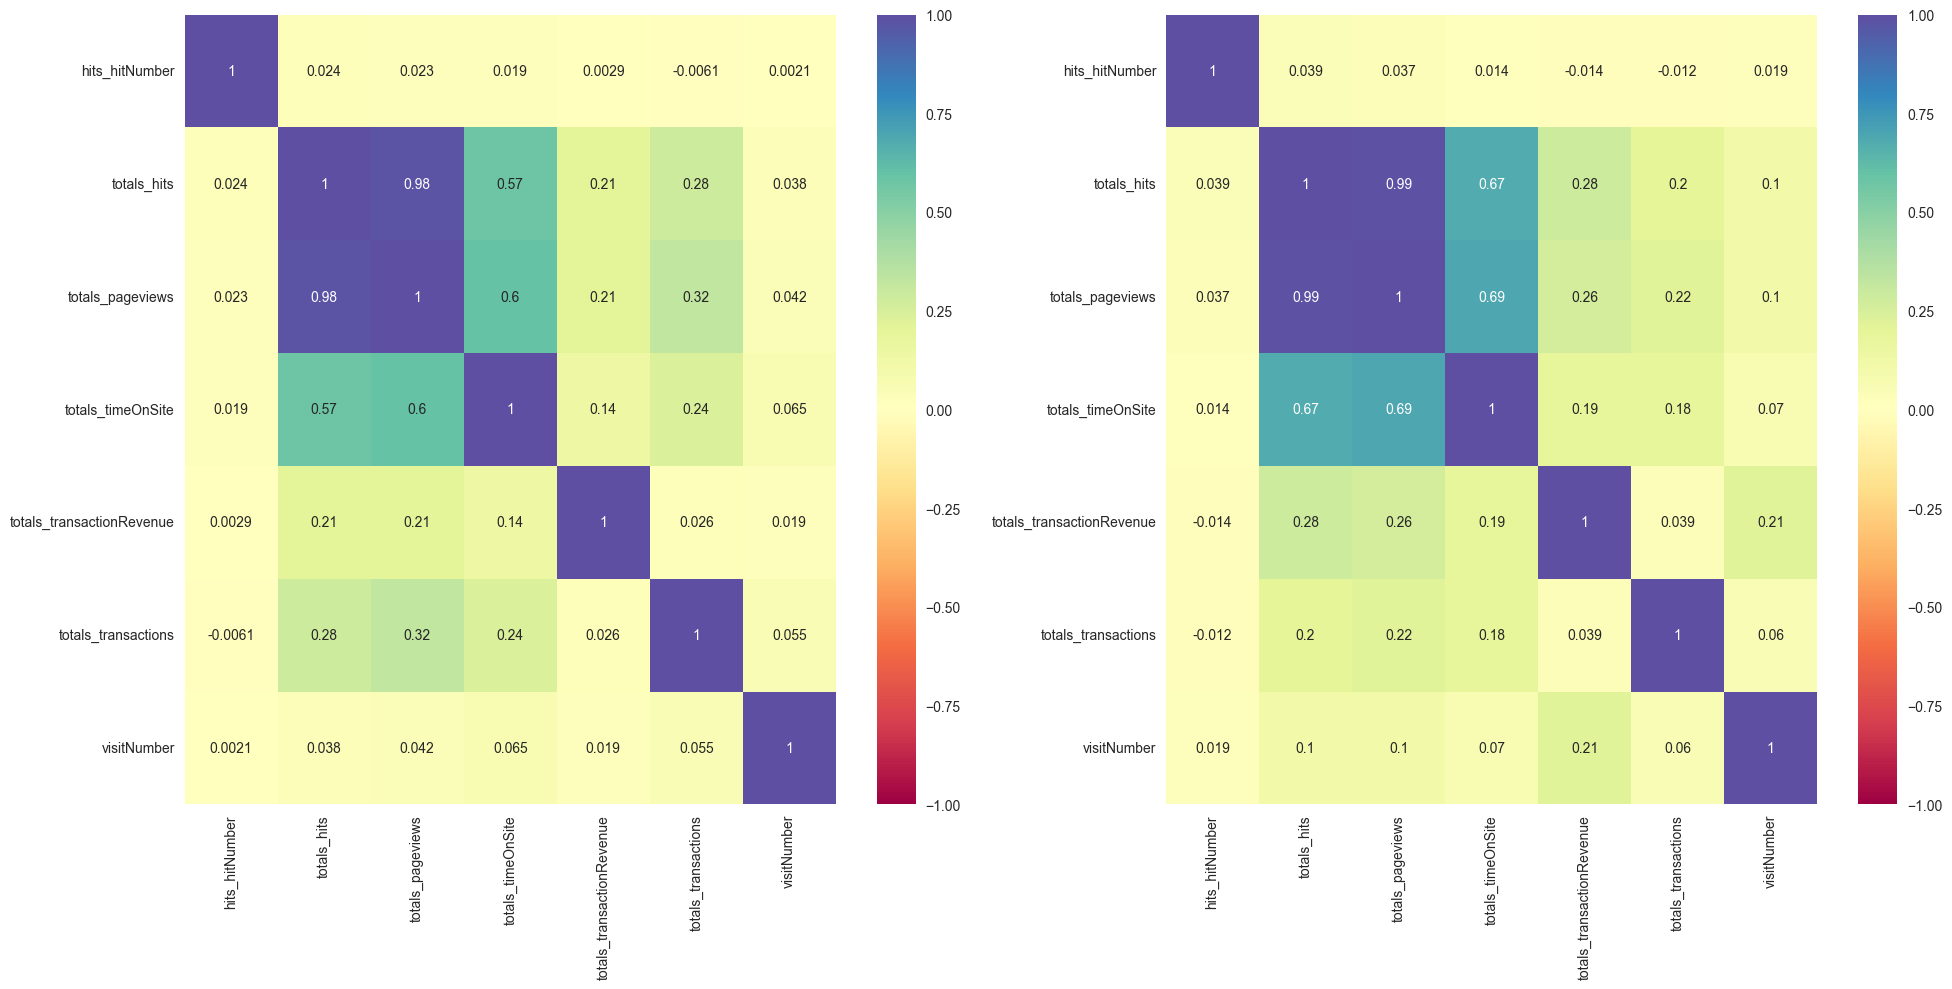

In [ ]:
nrows = 1
ncols = 2
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')
fig = plt.figure(figsize=(20, 10))

plot1 = fig.add_subplot(gs[0, 0])
sns.heatmap(chk_corr.corr(), annot=True, vmin=-1, vmax=1,  cmap='Spectral', ax=plot1);

plot2 = fig.add_subplot(gs[0, 1])
sns.heatmap(chk_corr_log, annot=True, vmin=-1, vmax=1,  cmap='Spectral', ax=plot2);

plt.tight_layout()
plt.show()

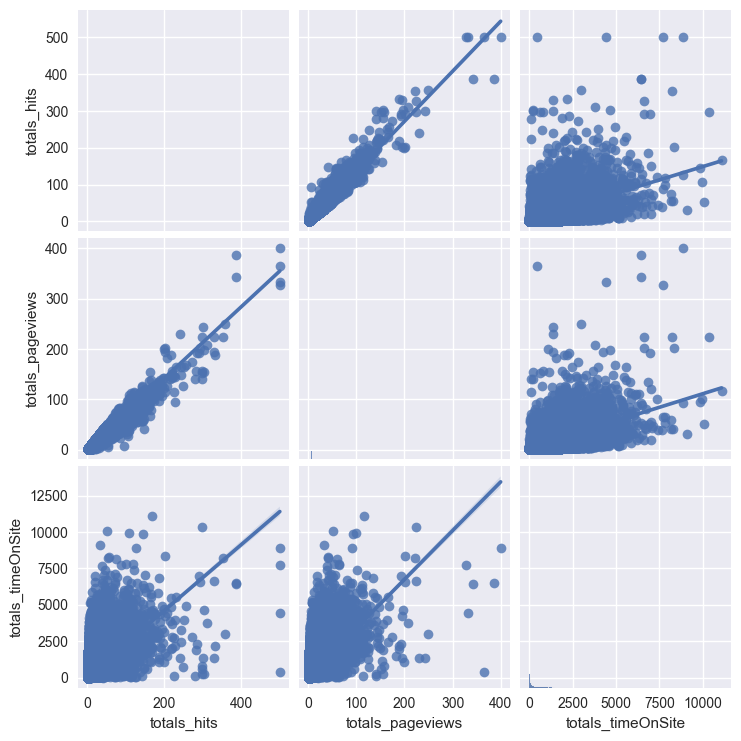

In [ ]:
sns.pairplot(chk_corr[['totals_hits', 'totals_pageviews', 'totals_timeOnSite']], kind='reg')

---

In [ ]:
from sklearn.preprocessing import StandardScaler

chk_corr_ss = StandardScaler()
chk_corr_ss = chk_corr_ss.fit_transform(chk_corr)
chk_corr_ss = pd.DataFrame(chk_corr_ss)
chk_corr_ss.columns = [chk_corr.columns]
chk_corr_ss

,hits_hitNumber,totals_hits,totals_pageviews,totals_timeOnSite,totals_transactionRevenue,totals_transactions,visitNumber
0,-0.026021,-0.377249,-0.411575,NaN,-0.043369,NaN,-0.139768
1,-0.026021,-0.264459,-0.255292,-0.473170,-0.043369,NaN,0.393984
2,-0.026021,-0.264459,-0.255292,-0.451642,-0.043369,NaN,-0.139768
3,-0.026021,-0.264459,-0.255292,-0.531297,-0.043369,NaN,-0.139768
4,-0.026021,-0.264459,-0.255292,-0.421502,-0.043369,NaN,-0.139768
...,...,...,...,...,...,...,...
499995,-0.026021,-0.377249,-0.411575,NaN,-0.043369,NaN,-0.139768
499996,-0.026021,-0.377249,-0.411575,NaN,-0.043369,NaN,-0.139768
499997,-0.026021,-0.377249,-0.411575,NaN,-0.043369,NaN,-0.139768
499998,-0.026021,-0.377249,-0.411575,NaN,-0.043369,NaN,-0.139768


/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/1957971255.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


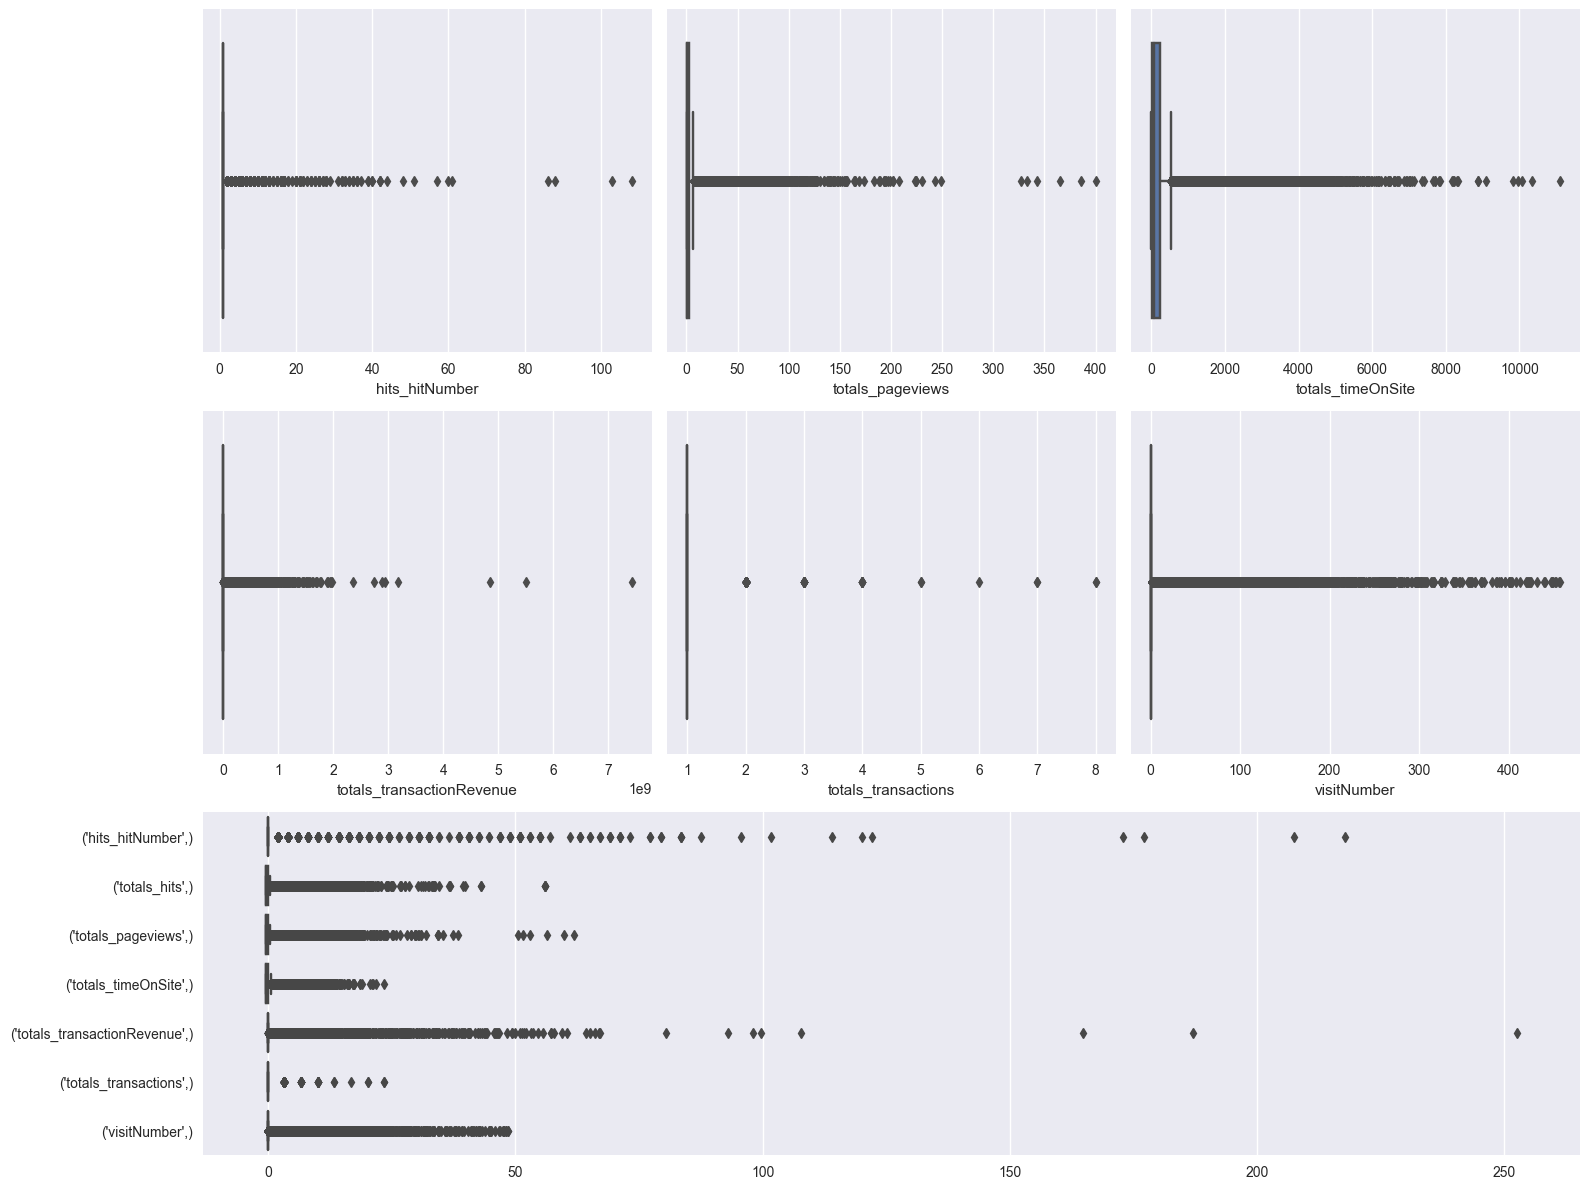

In [ ]:
nrows = 3
ncols = 3
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols)
plt.style.use('seaborn')
fig = plt.figure(figsize=(16, 12))

plot1_0 = fig.add_subplot(gs[0, 0])
sns.boxplot(data=chk_corr['hits_hitNumber'], x=chk_corr['hits_hitNumber'].index, orient='h', ax=plot1_0)

plot1_1 = fig.add_subplot(gs[0, 1])
sns.boxplot(data=chk_corr['totals_pageviews'], x=chk_corr['totals_pageviews'].index, orient='h', ax=plot1_1)

plot1_2 = fig.add_subplot(gs[0, 2])
sns.boxplot(data=chk_corr['totals_timeOnSite'], x=chk_corr['totals_timeOnSite'].index, orient='h', ax=plot1_2)

plot2_0 = fig.add_subplot(gs[1, 0])
sns.boxplot(data=chk_corr['totals_transactionRevenue'], x=chk_corr['totals_transactionRevenue'].index, orient='h', ax=plot2_0)

plot2_1 = fig.add_subplot(gs[1, 1])
sns.boxplot(data=chk_corr['totals_transactions'], x=chk_corr['totals_transactions'].index, orient='h', ax=plot2_1)

plot2_2 = fig.add_subplot(gs[1, 2])
sns.boxplot(data=chk_corr['visitNumber'], x=chk_corr['visitNumber'].index, orient='h', ax=plot2_2)

plot3 = fig.add_subplot(gs[2, :])
sns.boxplot(data=chk_corr_ss, orient='h', ax=plot3)

plt.tight_layout()
plt.show()



In [ ]:
train.visitStartTime

0         1508198450
1         1508176307
2         1508201613
3         1508169851
4         1508190552
             ...    
499995    1511131859
499996    1511153899
499997    1511113733
499998    1511114113
499999    1511121537
Name: visitStartTime, Length: 500000, dtype: int64

---

### 시계열

- train.date : int64형 -> datetime으로 변환
> ```
> train.date = train.date.astype('str')
> train.date = pd.to_datetime(train.date)
> ```

- train.hits_hour : object형 -> datetime 또는 int형 변환 필요
- train.hits_minute : object형 -> datetime 또는 int형 변환 필요

> - hits_hour와 hits_minute 를 합쳐서 시간컬럼을 새로 만들어야할듯

- train.hits_time : 0, nan -> 버려도 될듯?

- visitStartTime : Timestamp형태 -> datetime으로 변환 필요

In [ ]:
train.visitStartTime

0         1508198450
1         1508176307
2         1508201613
3         1508169851
4         1508190552
             ...    
499995    1511131859
499996    1511153899
499997    1511113733
499998    1511114113
499999    1511121537
Name: visitStartTime, Length: 500000, dtype: int64

---

### 불리언
- nan -> False
> - hits_exceptionInfo.isFatal : True, nan
> - hits_isEntrance : True, nan
> - hits_isExit : True, nan
> - hits_isInteraction : True, nan
> - hits_promotionActionInfo.promoIsView : True, nan
> - hits_promotionActionInfo.promoIsClick : True, nan
> - trafficSource_isTrueDirect : True, nan

- 1 -> Ture, nan -> False
> - totals_bounces : 1, nan
> - totals_newVisits : 1, nan

- nan -> False
> - trafficSource_adwordsClickInfo.isVideoAd : False, nan

---

### ID값

- fullVisitorId : 50만개
- hits_item.transactionId : 삭제된 컬럼
- visitId : 50만개

- fullVisitorId 와 visitId 값은 동일하지 않음

---

### 범주형

In [ ]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['결측값 비율'] = df.isnull().sum().values /  len(df) *100
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

In [ ]:
df = resumetable(train)
df.to_excel('./resumetable.xlsx')

데이터 세트 형상: (500000, 106)


---

In [ ]:
def create_sample(df: pd.core.frame.DataFrame, frac=0.2, replace=False, n=1):
    import datetime
    print('Original DataFrame Shape : ', df.shape)

    if frac * n > 1:
        return print('Please check frac, n')

    else:
        for i in range(n):
            date = str(datetime.datetime.now().date())
            sample = df.sample(frac=frac, replace=replace)
            sample.to_csv(f'./sample_{date}_{i}.csv', encoding='utf-8')
            print('-----------------------------------------------------')
            print(f'Complete create sample named : sample_{date}_{i}.csv')
            print('Sampled DataFrame Shape : ', sample.shape)
            print('-----------------------------------------------------')

In [ ]:
create_sample(train, frac=0.2, replace=False, n=5)

Original DataFrame Shape :  (500000, 106)
-----------------------------------------------------
Complete create sample named : sample_2023-04-06_0.csv
Sampled DataFrame Shape :  (100000, 106)
-----------------------------------------------------
-----------------------------------------------------
Complete create sample named : sample_2023-04-06_1.csv
Sampled DataFrame Shape :  (100000, 106)
-----------------------------------------------------
-----------------------------------------------------
Complete create sample named : sample_2023-04-06_2.csv
Sampled DataFrame Shape :  (100000, 106)
-----------------------------------------------------
-----------------------------------------------------
Complete create sample named : sample_2023-04-06_3.csv
Sampled DataFrame Shape :  (100000, 106)
-----------------------------------------------------
-----------------------------------------------------
Complete create sample named : sample_2023-04-06_4.csv
Sampled DataFrame Shape :  (10000

In [ ]:
sample_0 = pd.read_csv('./sample_2023-04-06_0.csv', encoding='utf-8', index_col=0)
sample_1 = pd.read_csv('./sample_2023-04-06_1.csv', encoding='utf-8', index_col=0)
sample_2 = pd.read_csv('./sample_2023-04-06_2.csv', encoding='utf-8', index_col=0)
sample_3 = pd.read_csv('./sample_2023-04-06_3.csv', encoding='utf-8', index_col=0)
sample_4 = pd.read_csv('./sample_2023-04-06_4.csv', encoding='utf-8', index_col=0)

/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/3511850766.py:1: DtypeWarning: Columns (8,62,70,100) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_0 = pd.read_csv('./sample_2023-04-06_0.csv', encoding='utf-8', index_col=0)
/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/3511850766.py:2: DtypeWarning: Columns (8,20,23,54,62,100) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_1 = pd.read_csv('./sample_2023-04-06_1.csv', encoding='utf-8', index_col=0)
/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/3511850766.py:3: DtypeWarning: Columns (8,54,62,70,100) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_2 = pd.read_csv('./sample_2023-04-06_2.csv', encoding='utf-8', index_col=0)
/var/folders/1r/269j727s0kq0nnxlvwgdhs180000gn/T/ipykernel_960/3511850766.py:4: DtypeWarning: Columns (8,54,70,100) have mixed types. Specify dtype option on import o

In [ ]:
sample_0.head()

,hits_transaction.currencyCode,hits_latencyTracking.domLatencyMetricsSample,hits_referer,geoNetwork_region,hits_contentGroup.previousContentGroup5,totals_newVisits,totals_totalTransactionRevenue,hits_isInteraction,hits_eventInfo.eventAction,hits_latencyTracking.pageLoadSample,...,hits_time,hits_latencyTracking.redirectionTime,trafficSource_isTrueDirect,hits_exceptionInfo.isFatal,visitId,hits_latencyTracking.pageLoadTime,hits_publisher_infos,hits_latencyTracking.domInteractiveTime,trafficSource_adwordsClickInfo.adNetworkType,hits_type
67531,NaN,NaN,NaN,California,(entrance),NaN,NaN,True,NaN,NaN,...,0.0,NaN,True,True,1498845394,NaN,[],NaN,NaN,PAGE
280862,USD,NaN,NaN,not available in demo dataset,(entrance),1.0,NaN,True,NaN,NaN,...,0.0,NaN,True,True,1477509671,NaN,[],NaN,NaN,PAGE
331603,NaN,NaN,https://www.google.com/,Colorado,(entrance),1.0,NaN,True,NaN,NaN,...,0.0,NaN,NaN,True,1480378874,NaN,[],NaN,NaN,PAGE
337642,USD,NaN,https://www.google.com.tr/,Izmir,(entrance),1.0,NaN,True,NaN,NaN,...,0.0,NaN,NaN,True,1479843397,NaN,[],NaN,NaN,PAGE
379314,NaN,NaN,https://www.google.com/,California,(entrance),1.0,NaN,True,NaN,NaN,...,0.0,NaN,NaN,True,1476995689,NaN,[],NaN,NaN,PAGE


In [ ]:
sample_0['totals_transactionRevenue']

67531     0
280862    0
331603    0
337642    0
379314    0
         ..
185798    0
417309    0
295719    0
364698    0
486554    0
Name: totals_transactionRevenue, Length: 100000, dtype: int64

---

In [ ]:
sample_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 67531 to 486554
Columns: 106 entries, hits_transaction.currencyCode to hits_type
dtypes: bool(1), float64(30), int64(6), object(69)
memory usage: 81.0+ MB


In [ ]:
def get_type_df(df):
    type_list = []

    for i in sample_0.columns:
        type_list.append([i, sample_0[i].dtype])
    
    type_df = pd.DataFrame(type_list)
    type_df.columns = ['columns', 'dtype']

    return type_df

In [ ]:
sample_0.date = sample_0.date.astype('str')
sample_0.date = pd.to_datetime(sample_0.date)

In [ ]:
sample_0_type = get_type_df(sample_0)
sample_0_type[sample_0_type['dtype'] == 'object'].head()

,columns,dtype
0,hits_transaction.currencyCode,object
2,hits_referer,object
3,geoNetwork_region,object
4,hits_contentGroup.previousContentGroup5,object
7,hits_isInteraction,object


In [ ]:
float_cols = sample_0_type[sample_0_type['dtype'] == 'float64']
float_cols

,columns,dtype
1,hits_latencyTracking.domLatencyMetricsSample,float64
5,totals_newVisits,float64
6,totals_totalTransactionRevenue,float64
9,hits_latencyTracking.pageLoadSample,float64
10,hits_latencyTracking.serverResponseTime,float64
11,hits_eCommerceAction.action_type,float64
13,hits_hour,float64
21,hits_latencyTracking.domContentLoadedTime,float64
25,hits_appInfo.screenDepth,float64
26,customDimensions_index,float64


In [ ]:
sample_0_type[sample_0_type['dtype'] == 'int64']

,columns,dtype
31,totals_hits,int64
71,visitStartTime,int64
74,totals_transactionRevenue,int64
89,visitNumber,int64
100,visitId,int64


In [ ]:
sample_0_type[sample_0_type['dtype'] == 'bool']

,columns,dtype
42,device_isMobile,bool


In [ ]:
sample_0_type[sample_0_type['columns'] == 'date']

,columns,dtype
23,date,datetime64[ns]


In [ ]:
sample_0_type[sample_0_type['dtype'] == 'object']['columns'].tolist()

['hits_transaction.currencyCode',
 'hits_referer',
 'geoNetwork_region',
 'hits_contentGroup.previousContentGroup5',
 'hits_isInteraction',
 'hits_eventInfo.eventAction',
 'hits_contentGroup.contentGroup4',
 'hits_social.socialNetwork',
 'device_operatingSystem',
 'device_browser',
 'hits_page.pagePathLevel4',
 'trafficSource_medium',
 'hits_page.searchCategory',
 'hits_promotionActionInfo.promoIsView',
 'hits_page.searchKeyword',
 'hits_contentGroup.contentGroup2',
 'hits_customDimensions',
 'hits_dataSource',
 'hits_appInfo.exitScreenName',
 'hits_appInfo.screenName',
 'hits_item.currencyCode',
 'hits_eventInfo.eventCategory',
 'hits_isEntrance',
 'hits_contentGroup.previousContentGroup2',
 'geoNetwork_city',
 'trafficSource_adContent',
 'hits_social.hasSocialSourceReferral',
 'channelGrouping',
 'trafficSource_adwordsClickInfo.slot',
 'hits_isExit',
 'hits_page.hostname',
 'hits_promotionActionInfo.promoIsClick',
 'hits_contentGroup.contentGroup5',
 'hits_customVariables',
 'customD

In [ ]:
sample_0_type = sample_0_type[~((sample_0_type['columns'] == 'fullVisitorId') | (sample_0_type['columns'] == 'visitId'))]

In [ ]:
sample_0_type.sort_values(by='dtype', inplace=True)
sample_0_type.to_excel('./sample_0_type.xlsx')